In [94]:
#Loading necessary libraries

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import os
import csv
import re
import numpy as np
import pandas as pd
from IPython.display import display
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from pylab import plt, mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
from sklearn.linear_model import RidgeCV, LassoCV 

In [95]:
def display_scores(scores):
    print("Scores:", -scores)
    print("Mean:", -scores.mean())
    print("Standard deviation:", scores.std())

In [96]:
def display_scores1(scores):
    print("Scores_MAE:", -scores)
    print("Mean_MAE:", -scores.mean())
    print("Standard deviation_MAE:", scores.std())

In [97]:
# Κατασκευή Συνάρτησης υπολογισμού του μέσου απόλυτου ποσοστιαίου σφάλματος
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [98]:
data=pd.read_excel(open('Concrete_Data.xls', 'rb') ) #Eισαγωγή των δεδομένων του προβλήματος

In [99]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [101]:
Data = np.array(data) #Μετατροπή του αρχείου σε μορφή πίνακα

In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [103]:
Data.shape

(1030, 9)

In [104]:
X, y = Data[:, :-1], Data[:, -1]  # Διαχωρισμός των δεδομένων σε πίνακα σχεδιασμού και διάνυσμα στόχο

In [105]:
# Διαχωρισμός των δεδομένων σε train και test set
X_train= X[0:721]
y_train=y[0:721]
X_test= X[721:1030]
y_test=y[721:1030]

In [106]:
y_train.reshape(1,-1)
y_test.reshape(1,-1)
X_train.reshape(-1,1)
X_test.reshape(-1,1)

array([[310. ],
       [  0. ],
       [  0. ],
       ...,
       [864.5],
       [761.5],
       [ 28. ]])

In [107]:
# Αξιολόγηση της επίδοσης της μεθόδου (OLS) σε μη κλιμακοποιημένα σύνολα εκπαίδευσης και αξιολόγησης
#Εκπαίδευση του μοντέλου
clf = skl.LinearRegression().fit(X_train, y_train)
ytilde_test = clf.predict(X_test)
ytilde_train = clf.predict(X_train)

#Αποτελέσματα στο σύνολο εκπαίδευσης (train set)
mse_train_split_noScale = mean_squared_error(y_train, ytilde_train)
mae_train_split_noScale = mean_absolute_error(y_train, ytilde_train)
mape_train_split_noScale = mape(y_train, ytilde_train)

#Αποτελέσματα στο σύνολο δοκιμής (test set)
mse_test_split_noScale = mean_squared_error(y_test, ytilde_test)
mae_test_split_noScale= mean_absolute_error(y_test, ytilde_test)
mape_test_split_noScale = mape(y_test, ytilde_test)
print("Αποτελέσματα της μεθόδου (OLS) σε μη κλιμακοποιημένα δεδομένα")
print("-------------------------------------------------------")
# The mean squared error                               
print("Mean squared error of OLS on train data: %.4f" % mse_train_split_noScale )
# MAE                                 
print('Mean absolute error of OLS train data: %.4f' % mae_train_split_noScale  )
# MAPE                                                          
print('Mean absolute percentage error of OLS on train data: %.4f' % mape_train_split_noScale )

# The mean squared error                               
print("\nMean squared error of OLS on testing data: %.4f" % mse_test_split_noScale)
# MAE  
print('Mean absolute error of OLS on testing data: %.4f' % mae_test_split_noScale)
# MAPE                                                           
print("Mean percentage absolute error of OLS on testing data: %.4f" % mape_test_split_noScale )


Αποτελέσματα της μεθόδου (OLS) σε μη κλιμακοποιημένα δεδομένα
-------------------------------------------------------
Mean squared error of OLS on train data: 124.2541
Mean absolute error of OLS train data: 8.9899
Mean absolute percentage error of OLS on train data: 33.3565

Mean squared error of OLS on testing data: 73.2000
Mean absolute error of OLS on testing data: 6.6089
Mean percentage absolute error of OLS on testing data: 25.9313


In [108]:
# Κλιμακοποίηση των δεδομένων
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [109]:
# Αξιολόγηση της επίδοσης της μεθόδου (OLS) σε κλιμακοποιημένα σύνολα εκπαίδευσης και αξιολόγησης
# Εκπαίδευση του μοντέλου
clf = skl.LinearRegression().fit(X_train_scaled, y_train)
y_pred_test_scaled = clf.predict(X_test_scaled)
y_pred_train_scaled = clf.predict(X_train_scaled)


#Αποτελέσματα στο σύνολο εκπαίδευσης (train set)
mse_train_split_scaled = mean_squared_error(y_train, y_pred_train_scaled) 
mae_train_split_scaled = mean_absolute_error(y_train, y_pred_train_scaled)     
mape_train_split_scaled= mape (y_train, y_pred_train_scaled)
      
#Αποτελέσματα στο σύνολο δοκιμής (test set)     
mse_test_split_scaled = mean_squared_error(y_test, y_pred_test_scaled)
mae_test_split_scaled = mean_squared_error(y_test, y_pred_test_scaled)
mape_test_split_scaled= mape (y_test, y_pred_test_scaled)
print("Αποτελέσματα της μεθόδου (OLS) σε κλιμακοποιημένα δεδομένα")
print("-------------------------------")
# The mean squared error                            
print("\nMean squared error of OLS on training data: %.4f" % mse_train_split_scaled)                              
# Mean absolute error                                                           
print('Mean absolute error of OLS on training data: %.4f' % mean_absolute_error(y_train, y_pred_train_scaled))

print('MAPE of OLS on training data: %.4f' % mape_train_split_scaled)
      
# The mean squared error                               
print("\nMean squared error of OLS on test data: %.4f" % mse_test_split_scaled)

# Mean absolute error                                                           
print('Mean absolute error of OLS on test data: %.4f' % mean_absolute_error(y_test, y_pred_test_scaled))
      
# Mean absolute percentage error                                
print('MAPE of OLS test data: %.4f' % mape_test_split_scaled)

Αποτελέσματα της μεθόδου (OLS) σε κλιμακοποιημένα δεδομένα
-------------------------------

Mean squared error of OLS on training data: 124.2541
Mean absolute error of OLS on training data: 8.9899
MAPE of OLS on training data: 33.3565

Mean squared error of OLS on test data: 76.7813
Mean absolute error of OLS on test data: 7.0366
MAPE of OLS test data: 29.3867


In [110]:
# Αξιολόγηση της μεθόδου Ridge
n_alphas = 200
alphas = np.logspace(6, -4, n_alphas)
MAE=[]
MSE = []
MAPE=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True)
    clf = ridge.fit(X_train_scaled, y_train)
    y_pred_test_scaled = clf.predict(X_test_scaled)
    y_pred_train_scaled = clf.predict(X_train_scaled)
    mse_train_split_scaled = mean_squared_error(y_train, y_pred_train_scaled)
    mse_test_split_scaled = mean_squared_error(y_test, y_pred_test_scaled)
    MSE.append(mse_train_split_scaled)
    mae_test_split_scaled = mean_absolute_error(y_test, y_pred_test_scaled)
    mae_train_split_scaled = mean_absolute_error(y_train, y_pred_train_scaled)
    MAE.append(mae_train_split_scaled)
    mape_test_split_scaled=mape(y_test, y_pred_test_scaled)
    mape_train_split_scaled= mape (y_train, y_pred_train_scaled)
    MAPE.append(mape_train_split_scaled)

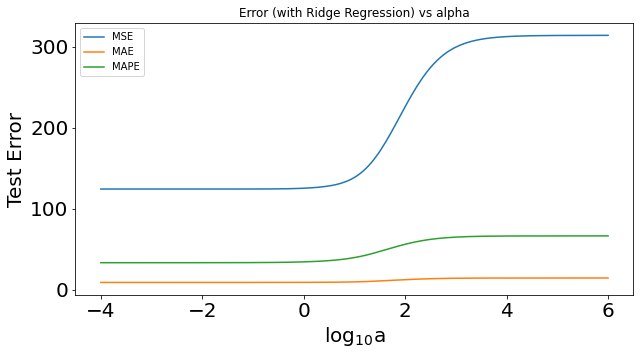

In [111]:
fig1 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(np.log10(alphas), MSE,  label = 'MSE')
plt.plot(np.log10(alphas), MAE,  label = 'MAE')
plt.plot(np.log10(alphas), MAPE,  label = 'MAPE')
plt.xlabel('log$_{10}$a',size=20)
plt.ylabel('Test Error',size=20)
plt.title('Error (with Ridge Regression) vs alpha', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

In [112]:
# Αξιολόγηση της μεθόδου LASSO
n_alphas = 200
alphas = np.logspace(6, -4, n_alphas)

MAE=[]
MSE = []
MAPE=[]
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True)
    clf = lasso.fit(X_train_scaled, y_train)
    y_pred_test_scaled = clf.predict(X_test_scaled)
    y_pred_train_scaled = clf.predict(X_train_scaled)
    mse_train_split_scaled = mean_squared_error(y_train, y_pred_train_scaled)
    mse_test_split_scaled = mean_squared_error(y_test, y_pred_test_scaled)
    MSE.append(mse_train_split_scaled)
    mae_test_split_scaled = mean_absolute_error(y_test, y_pred_test_scaled)
    mae_train_split_scaled = mean_absolute_error(y_train, y_pred_train_scaled)
    MAE.append(mae_train_split_scaled)
    mape_test_split_scaled=mape(y_test, y_pred_test_scaled)
    mape_train_split_scaled= mape (y_train, y_pred_train_scaled)
    MAPE.append(mape_train_split_scaled)


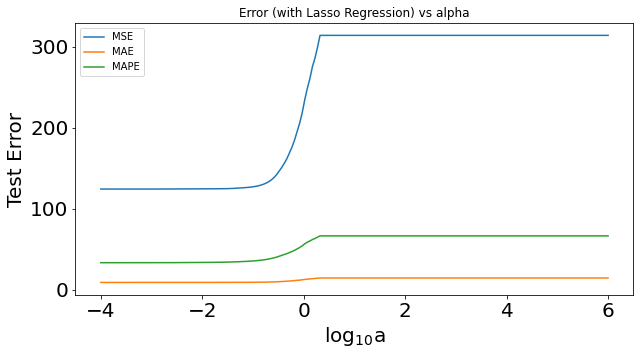

In [113]:
fig2 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(np.log10(alphas), MSE,  label = 'MSE')
plt.plot(np.log10(alphas), MAE,  label = 'MAE')
plt.plot(np.log10(alphas), MAPE,  label = 'MAPE')
plt.xlabel('log$_{10}$a',size=20)
plt.ylabel('Test Error',size=20)
plt.title('Error (with Lasso Regression) vs alpha', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

In [114]:
# Τυχαία ανακατανομή των δεδομένων και κλιμακοποίηση
np.random.shuffle(Data)
X, y = Data[:, :-1], Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [115]:
# Μέθοδοι γραμμικ΄ης παλινδρόμησης που θα χρησιμοποιήσουμε
regr = linear_model.LinearRegression()#.fit(X_train_scaled, y_train)
lasso = linear_model.Lasso(alpha=0.01)#,# fit_intercept=True)#.fit(X_train_scaled, y_train)
ridge= linear_model.Ridge(alpha=0.01)#, #fit_intercept=True)#.fit(X_train_scaled, y_train)

# Cross Validation

In [116]:
# H μέση τιμή και η τυπική απόκλιση του MSE στο OLS
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(regr, X_train_scaled, y_train, scoring ="neg_mean_squared_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [10.46994104 10.53707407 10.88499136 10.59793245  9.93715496 11.3206612
  9.90678506 10.45087265 10.32407516 10.51640883]
Mean: 10.494589678434561
Standard deviation: 0.39186860423637754



In [117]:
# H μέση τιμή και η τυπική απόκλιση του MAE στο OLS
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(regr, X_train_scaled, y_train, scoring ="neg_mean_absolute_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [2.87160738 2.98812434 2.88672633 2.8541445  2.90001257 2.87403811
 2.92921095 3.00603404 2.88064146 2.89705771]
Mean: 2.908759738370762
Standard deviation: 0.048205346042975515



In [118]:
#H μέση τιμή και η τυπική απόκλιση του MSE στο Ridge
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring ="neg_mean_squared_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [11.28091374 10.80904386 10.85251449 10.75812351 10.0988176  10.64506424
 10.99100357 10.49193045 10.57904459 10.69816693]
Mean: 10.720462298298735
Standard deviation: 0.29645422897814977



In [119]:
#H μέση τιμή και η τυπική απόκλιση του MAE στο Ridge
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring ="neg_mean_absolute_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [2.82938275 2.96515655 2.96582839 2.82893141 2.92644692 2.93201442
 2.89427555 2.80291109 2.96178147 2.89573834]
Mean: 2.9002466887373646
Standard deviation: 0.05799498611150056



In [120]:
#H μέση τιμή και η τυπική απόκλιση του MSE στο LASSO
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(lasso, X_train_scaled, y_train, scoring ="neg_mean_squared_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [10.44167332 10.43160635 10.50520307 10.67040907 10.33158037 10.84732013
 10.48441804 10.17158796 10.56051745  9.96556867]
Mean: 10.44098844434222
Standard deviation: 0.23424245998564597



In [121]:
#H μέση τιμή και η τυπική απόκλιση του MAE στο LASSO
shuffle = ShuffleSplit(n_splits = 10, test_size=0.3)

lin_scores = cross_val_score(lasso, X_train_scaled, y_train, scoring ="neg_mean_absolute_error",cv=shuffle)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(-lin_scores)
print("")

Linear regression
Scores: [2.90177084 2.82941856 2.94406988 2.838688   2.93355799 2.88974854
 2.91476667 2.85227194 2.93480254 2.91778813]
Mean: 2.8956883079155085
Standard deviation: 0.03969278681225797



In [122]:
# Διαχωρισμός των δεδομένων σε train και test set
X_train= X[0:721]
y_train=y[0:721]
X_test= X[721:1030]
y_test=y[721:1030]

In [123]:
np.random.shuffle(Data)
X, y = Data[:, :-1], Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [124]:
# Ορισμός πολυωνυμικής Συνάρτησης 
def test_poly_regression(X_train,y_train,X_test,y_test,n,model):

    X_train_new = X_train.copy()
    X_test_new =X_test.copy() 
    y_train_new = y_train.copy()
    y_test_new= y_test.copy()
    #Κατασκευή των πολυωνυμικών όρων για δωσμένο n
    for p in range(2, n+1):
        X_p = X_train**p
        X_train_new = np.hstack((X_train_new, X_p))
        Xt_p = X_test**p
        X_test_new = np.hstack((X_test_new, Xt_p))
        y_p = y_train**p
        y_train_new = np.hstack((y_train_new, y_p))
        yt_p = y_test**p
        y_test_new = np.hstack((y_test_new, yt_p))
    #Κλιμακοποίηση του τελικού συνόλου    
    scaler = MinMaxScaler()
    scaler.fit(X_train_new)
    scaler.fit(X_test_new)
    X_train_scaled = scaler.fit_transform(X_train_new)
    X_test_scaled = scaler.fit_transform(X_test_new)
    #Εκπαίδευση του μοντέλου επί του τελικού συνόλου
    clf1 = model.fit(X_train_scaled, y_train)
    # Προβλέψεις
    y_pred_test_scaled = clf1.predict(X_test_scaled)
    y_pred_train_scaled = clf1.predict(X_train_scaled)
    #Αποτελέσματα στο σύνολο αξιολόγησης
    mse_test = mean_squared_error(y_test, y_pred_test_scaled)
    mae_test = mean_absolute_error(y_test, y_pred_test_scaled)
    mape_test=mape(y_test, y_pred_test_scaled)
    #Αποτελέσμα στο σύνολο εκπαίδευσης
    mse_train = mean_squared_error (y_train, y_pred_train_scaled)
    mae_train = mean_absolute_error (y_train, y_pred_train_scaled)
    mape_train = mape (y_train, y_pred_train_scaled)
    
    # Τα σφάλματα που επιστρέφει η συνάρτηση
    return mse_test,mae_test,mape_test, mse_train,mae_train,mape_train

In [125]:
#Υπολογισμός των σφαλμάτων με την μέθοδο OLS για διάφορους βαθμούς του πολυωνύμου
MSE_test=[]
MAE_test=[]
MAPE_test=[]
MSE_train=[]
MAE_train=[]
MAPE_train=[]
nes=[1,2,3,4,5,6,7]
model1=regr
for n in nes :
    
    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    scaler.fit(X_test) 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    MSE_test.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[0])
    MAE_test.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[1])
    MAPE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[2])
    
    MSE_train.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[3])
    MAE_train.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[4])
    MAPE_train.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[5])


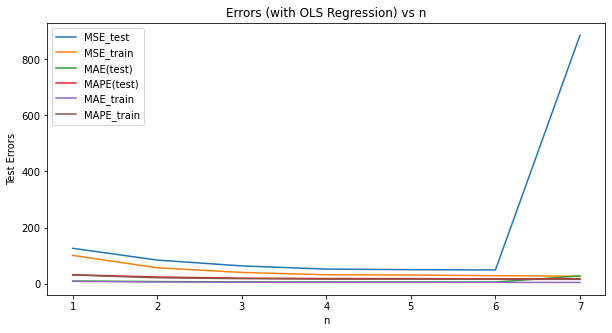

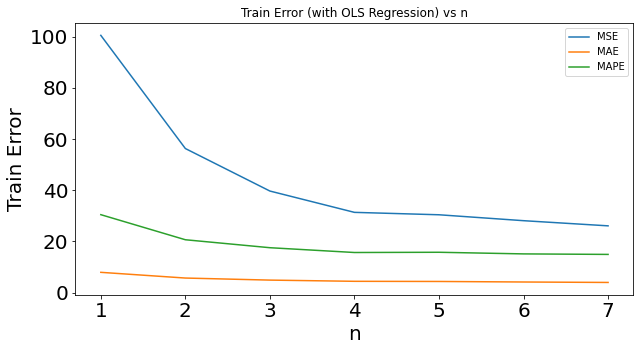

In [126]:
fig3 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_test,  label = 'MSE_test')
plt.plot(nes, MSE_train,  label = 'MSE_train')
plt.plot(nes, MAE_test,  label = 'MAE(test)')
plt.plot(nes, MAPE_test,  label = 'MAPE(test)')
plt.plot(nes, MAE_train,  label = 'MAE_train')
plt.plot(nes, MAPE_train,  label = 'MAPE_train')
plt.xlabel('n',size=10)
plt.ylabel('Test Errors',size=10)
plt.title('Errors (with OLS Regression) vs n', fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend()
plt.show()

fig4 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_train,  label = 'MSE')
plt.plot(nes, MAE_train,  label = 'MAE')
plt.plot(nes, MAPE_train,  label = 'MAPE')
plt.xlabel('n',size=20)
plt.ylabel('Train Error',size=20)
plt.title('Train Error (with OLS Regression) vs n', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

In [127]:
np.random.shuffle(Data)
X, y = Data[:, :-1], Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [128]:
#Υπολογισμός των σφαλμάτων με την μέθοδο Ridge για διάφορους βαθμούς του πολυωνύμου
MSE_test=[]
MAE_test=[]
MAPE_test=[]
MSE_train=[]
MAE_train=[]
MAPE_train=[]
nes=[1,2,3,4,5,6,7,8,9,10]
model1=ridge
for n in nes :
    
    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    scaler.fit(X_test) 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    MSE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[0])
    MAE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[1])
    MAPE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[2])
    
    MSE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[3])
    MAE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[4])
    MAPE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[5])
    

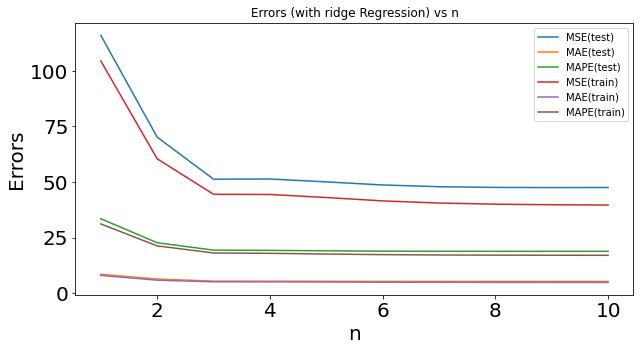

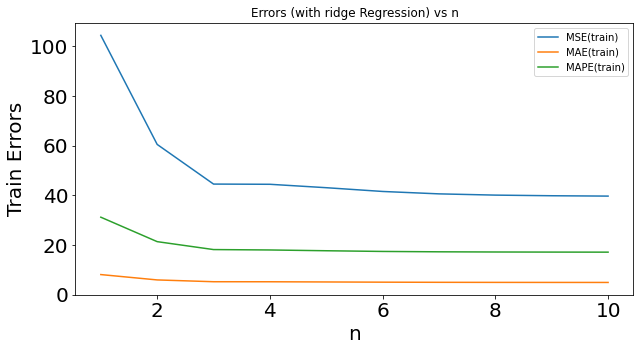

In [129]:
fig5 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_test,  label = 'MSE(test)')
plt.plot(nes, MAE_test,  label = 'MAE(test)')
plt.plot(nes, MAPE_test,  label = 'MAPE(test)')
plt.plot(nes, MSE_train,  label = 'MSE(train)')
plt.plot(nes, MAE_train,  label = 'MAE(train)')
plt.plot(nes, MAPE_train,  label = 'MAPE(train)')

plt.xlabel('n',size=20)
plt.ylabel('Errors',size=20)
plt.title('Errors (with ridge Regression) vs n', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

fig6 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_train,  label = 'MSE(train)')
plt.plot(nes, MAE_train,  label = 'MAE(train)')
plt.plot(nes, MAPE_train,  label = 'MAPE(train)')
plt.xlabel('n',size=20)
plt.ylabel('Train Errors',size=20)
plt.title('Errors (with ridge Regression) vs n', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

In [130]:
np.random.shuffle(Data)
X, y = Data[:, :-1], Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [131]:
#Υπολογισμός των σφαλμάτων με την μέθοδο Lasso για διάφορους βαθμούς του πολυωνύμου
MSE_test=[]
MAE_test=[]
MAPE_test=[]
MSE_train=[]
MAE_train=[]
MAPE_train=[]
nes=[1,2,3,4,5,6,7,8,9,10]
model1=lasso
for n in nes :
    
    scaler = MinMaxScaler()
    scaler.fit(X_train) 
    scaler.fit(X_test) 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    MSE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[0])
    MAE_test.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[1])
    MAPE_test.append(test_poly_regression(X_train,y_train,X_test,y_test,n,model1)[2])
    
    MSE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[3])
    MAE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[4])
    MAPE_train.append(test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,n,model1)[5])
    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.61547560890176, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.61547560890176, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.041566906329535, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.28517877420381, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.28517877420381, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.05664606241044, tolerance: 19.89620742036104
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

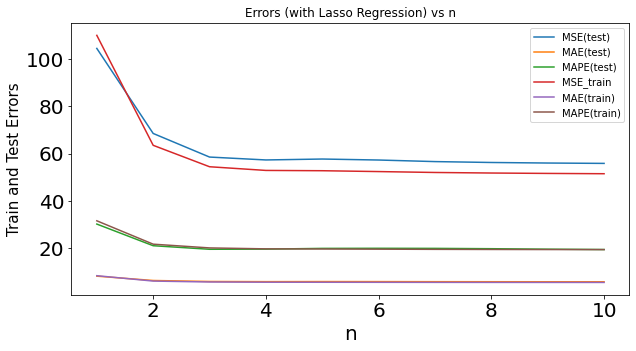

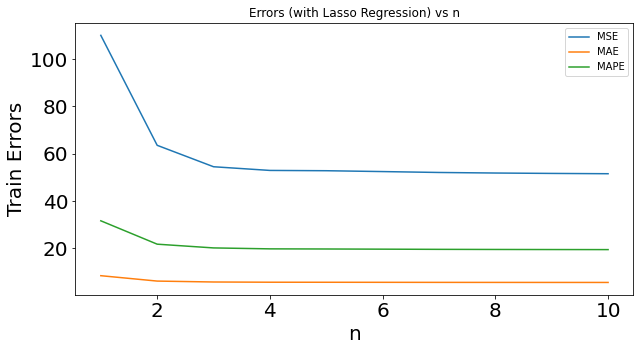

In [132]:

fig7 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_test,  label = 'MSE(test)')
plt.plot(nes, MAE_test,  label = 'MAE(test)')
plt.plot(nes, MAPE_test,  label = 'MAPE(test)')
plt.plot(nes, MSE_train,  label = 'MSE_train')
plt.plot(nes, MAE_train,  label = 'MAE(train)')
plt.plot(nes, MAPE_train,  label = 'MAPE(train)')
plt.xlabel('n',size=20)
plt.ylabel('Train and Test Errors',size=15)
plt.title('Errors (with Lasso Regression) vs n', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

fig8 = plt.figure(figsize=(10,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(nes, MSE_train,  label = 'MSE')
plt.plot(nes, MAE_train,  label = 'MAE')
plt.plot(nes, MAPE_train,  label = 'MAPE')
plt.xlabel('n',size=20)
plt.ylabel('Train Errors',size=20)
plt.title('Errors (with Lasso Regression) vs n', fontsize = 12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend()
plt.show()

In [143]:
np.random.shuffle(Data)
X, y = Data[:, :-1], Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = MinMaxScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [144]:
test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,4,ridge)[2]

18.473439451413775

In [145]:
test_poly_regression(X_train_scaled,y_train,X_test_scaled,y_test,3,regr)[2]

18.16187298691722